In [1]:
# !usr/bin/python
# -*- encoding: utf-8 -*-
# Project: Network in Network
# Author: Tracy Tao
# Date: 2022/04/12
import torch 
from torch import nn
from d2l import torch as d2l

- LeNet、AlexNet和VGG都有一个共同的设计模式：通过一系列的卷积层与汇聚层来提取空间结构特征；然后通过全连接层对特征的表征进行处理。 
    -  AlexNet和VGG对LeNet的改进主要在于如何扩大和加深这两个模块。
- NiN: 每个像素的通道上分别使用**多层感知机**
    - 在每个像素位置（针对每个高度和宽度）应用一个全连接层
    - NiN块以一个普通卷积层开始，后面是两个1 * 1的卷积层, 它们充当带有ReLU激活函数的逐像素全连接层。
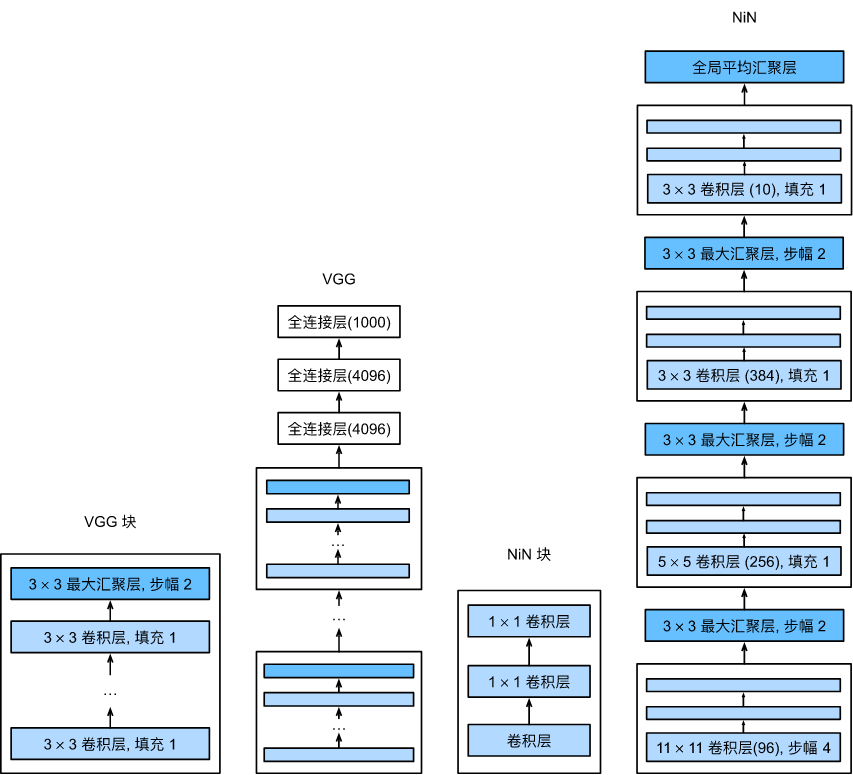


In [2]:
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),nn.ReLU(),
                         nn.Conv2d(out_channels, out_channels, kernel_size = 1), nn.ReLU(),
                         nn.Conv2d(out_channels, out_channels, kernel_size = 1), nn.ReLU())                         

In [3]:
def NiN():
    return nn.Sequential(nin_block(1, 96, kernel_size = 11, strides = 11, padding = 0),
                         nn.MaxPool2d(3, stride = 2),
                         nin_block(96, 256, kernel_size = 5, strides = 1, padding = 2),
                         nn.MaxPool2d(3, stride = 2),
                         nin_block(256, 384, kernel_size = 3, strides = 1, padding = 1),
                         nn.MaxPool2d(3, stride = 2),
                         nn.Dropout(0.5),
                         nin_block(384, 10, kernel_size = 3, strides = 1, padding = 1), # mnist 数字标签
                         nn.AdaptiveAvgPool2d((1, 1)),
                         nn.Flatten()) # 展平成二维 （batch_size, 10）


In [19]:
X = torch.rand(size=(1, 1, 224, 224))
net = NiN()
for layer in net:
    X = layer(X)
    print(f'{layer.__class__.__name__} output shape:\t\t {X.shape}')

Sequential output shape:		 torch.Size([1, 96, 20, 20])
MaxPool2d output shape:		 torch.Size([1, 96, 9, 9])
Sequential output shape:		 torch.Size([1, 256, 9, 9])
MaxPool2d output shape:		 torch.Size([1, 256, 4, 4])
Sequential output shape:		 torch.Size([1, 384, 4, 4])
MaxPool2d output shape:		 torch.Size([1, 384, 1, 1])
Dropout output shape:		 torch.Size([1, 384, 1, 1])
Sequential output shape:		 torch.Size([1, 10, 1, 1])
AdaptiveAvgPool2d output shape:		 torch.Size([1, 10, 1, 1])
Flatten output shape:		 torch.Size([1, 10])


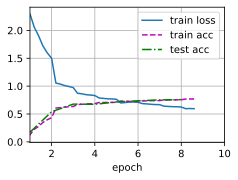

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())